In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# file management imports
import os  ### only for count of images from dir, can be removed later
import tensorflow as tf
# model imports for deep learning
from keras import Input, layers, models, regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import cv2
from sklearn import metrics
#for confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import itertools
from sklearn.metrics import ConfusionMatrixDisplay

#for displaying images when predicting class
from PIL import Image, ImageOps
#for rounding up fitting model for steps_per_epoch
import math

from keras.models import load_model
from google.colab import drive



In [ ]:
!pip install -q xplique

from xplique.attributions import GradientInput

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.4/191.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to this Notebook
! cd "/content/drive/My Drive/Colab_Notebooks/"
# Path to the zipped dataset
! unzip "/content/drive/My Drive/Colab_Notebooks/data_sillouhete_3class.zip"

Archive:  /content/drive/My Drive/Colab_Notebooks/data_sillouhete_3class.zip
   creating: data_sillouhete_3class/test/
   creating: data_sillouhete_3class/test/circle/
  inflating: data_sillouhete_3class/test/circle/3409.png  
  inflating: data_sillouhete_3class/test/circle/3410.png  
  inflating: data_sillouhete_3class/test/circle/3415.png  
  inflating: data_sillouhete_3class/test/circle/3416.png  
  inflating: data_sillouhete_3class/test/circle/3418.png  
  inflating: data_sillouhete_3class/test/circle/3419.png  
  inflating: data_sillouhete_3class/test/circle/3427.png  
  inflating: data_sillouhete_3class/test/circle/3428.png  
  inflating: data_sillouhete_3class/test/circle/3429.png  
  inflating: data_sillouhete_3class/test/circle/3430.png  
  inflating: data_sillouhete_3class/test/circle/3431.png  
  inflating: data_sillouhete_3class/test/circle/3439.png  
  inflating: data_sillouhete_3class/test/circle/3440.png  
  inflating: data_sillouhete_3class/test/circle/3441.png  
  infl

In [ ]:
train_dir = "data_sillouhete_3class/train/"
test_dir = "data_sillouhete_3class/test/"


#Location of train and test sets of circle
train_dir_circle = train_dir+"circle"
test_dir_circle = test_dir+"circle"
#Location of train and test sets of square
train_dir_square = train_dir+"square"
test_dir_square = test_dir+"square"
#Location of train and test sets of triangle
train_dir_triangle = train_dir+"triangle"
test_dir_triangle = test_dir+"triangle"

In [ ]:
#display image smaller (for checking manually)
def display_image(image_directory):
    im = image.load_img(image_directory)
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(im)

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=45
)

In [ ]:
# classes= ['Circle','Square','Triangle']
batch_size = 32

#making tensorflow for training data
training_data = datagen.flow_from_directory(directory= train_dir,       # dataset
                                                   target_size = (256,256),      # desired dimensions for the images
                                                   batch_size = batch_size,    # it will be run in groups of(batch_size specified above)
                                                   class_mode = 'categorical', # type of classifiaction
                                                   color_mode='rgb'
                                                   )
#making tensorflow for testing data
testing_data = datagen.flow_from_directory(directory= test_dir,
                                                   target_size = (256,256),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   color_mode='rgb'
                                                   )
training_data.image_shape

Found 2421 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


(256, 256, 3)

In [ ]:
input = Input(shape=(256, 256, 3))
x = layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=regularizers.L2(0.01))(input)
x = layers.MaxPool2D((2, 2))(x)

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPool2D((2, 2))(x)


x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(3, activation='softmax')(x)

model = models.Model(input, x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0   

# Nouvelle section

In [ ]:
history = model.fit(training_data, validation_data=testing_data, epochs=70)

Epoch 1/70
76/76 [==============================] - 43s 500ms/step - loss: 1.4564 - accuracy: 0.7352 - val_loss: 0.3291 - val_accuracy: 0.9187
Epoch 2/70
76/76 [==============================] - 38s 505ms/step - loss: 0.4439 - accuracy: 0.8546 - val_loss: 0.2510 - val_accuracy: 0.9333
Epoch 3/70
76/76 [==============================] - 38s 505ms/step - loss: 0.3860 - accuracy: 0.8707 - val_loss: 0.2347 - val_accuracy: 0.9396
Epoch 4/70
76/76 [==============================] - 38s 505ms/step - loss: 0.3263 - accuracy: 0.8943 - val_loss: 0.2337 - val_accuracy: 0.9396
Epoch 5/70
76/76 [==============================] - 38s 505ms/step - loss: 0.2921 - accuracy: 0.8951 - val_loss: 0.2813 - val_accuracy: 0.9292
Epoch 6/70
76/76 [==============================] - 38s 503ms/step - loss: 0.2741 - accuracy: 0.9058 - val_loss: 0.2526 - val_accuracy: 0.9104
Epoch 7/70
76/76 [==============================] - 38s 504ms/step - loss: 0.2332 - accuracy: 0.9190 - val_loss: 0.2020 - val_accuracy: 0.9500

In [ ]:
accuracy = history.history['accuracy'][1:]
loss = history.history['loss'][1:]
val_accuracy = history.history['val_accuracy'][1:]
val_loss = history.history['val_loss'][1:]

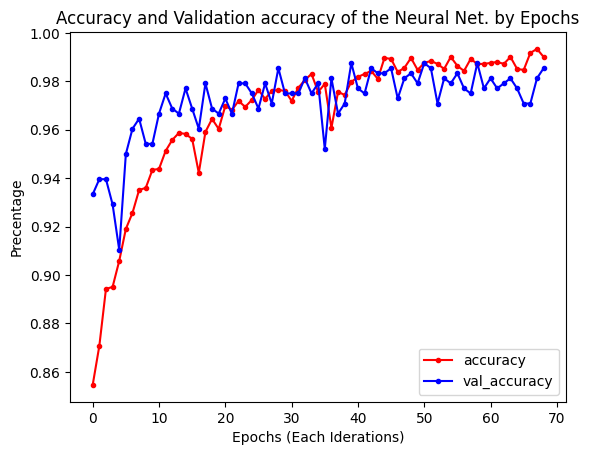

In [ ]:
#plot accuracy for model
plt.plot(range(len(accuracy)), accuracy, 'r', marker= '.', label = 'accuracy')
#plot loss for model
plt.plot(range(len(val_accuracy)), val_accuracy, 'b', marker= '.', label = 'val_accuracy')
plt.xlabel('Epochs (Each Iderations)')

plt.ylabel('Precentage')
plt.title('Accuracy and Validation accuracy of the Neural Net. by Epochs')
plt.legend()

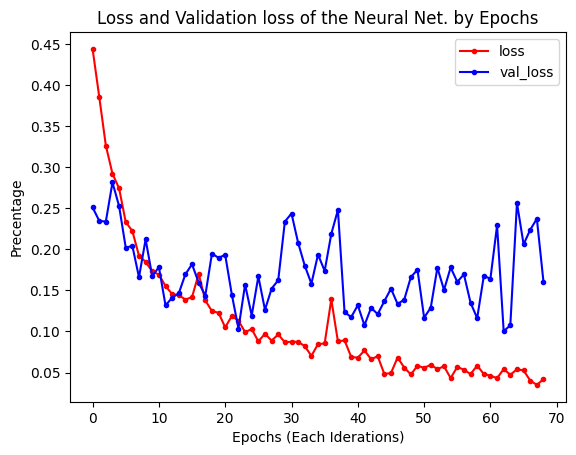

In [ ]:
plt.plot(range(len(loss)), loss, 'r', marker= '.', label = 'loss')
#plot loss for model
plt.plot(range(len(val_loss)), val_loss, 'b', marker= '.', label = 'val_loss')
plt.xlabel('Epochs (Each Iderations)')
plt.ylabel('Precentage')
plt.title('Loss and Validation loss of the Neural Net. by Epochs')
plt.legend()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_set=test_dir_circle+test_dir_square+test_dir_triangle
# predicted_classes = np.argmax(predictions, axis=1)
true_classes = testing_data.classes
class_labels = list(testing_data.class_indices.keys())
print(class_labels)
print(true_classes)
testing_data
predictions = model.predict(testing_data)
predicted_classes = np.argmax(predictions, axis=1)


['circle', 'square', 'triangle']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
cm = metrics.confusion_matrix(true_classes, predicted_classes)

In [ ]:
yhat = []

def evaluate_dir(directory, label):
    files = os.listdir(directory)
    count = 0
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            try:
                img = cv2.resize(img, (256, 256))
                yhat.append(np.argmax(model.predict(np.expand_dims(img, [0, -1]))))
                count += 1
            except:
                print(file)

    print(f"Count: {count}")

evaluate_dir(test_dir_circle, 0)
evaluate_dir(test_dir_square, 1)
evaluate_dir(test_dir_triangle, 2)



dodeca sillou-223.jpg
3513.png
dodeca sillou-204.jpg
3525.png
3511.png
circle-23.jpg
3531.png
circle-3.jpg
circle-24.jpg
circle-29.jpg
dodeca sillou-216.jpg
circle-200.jpg
circle-19.jpg
circle-4.jpg
3569.png
circle-38.jpg
3506.png
3509.png
circle-12.jpg
circle-1.jpg
circle-25.jpg
3410.png
3446.png
3536.png
circle-11.jpg
circle-199.jpg
3507.png
3492.png
3524.png
3504.png
dodeca sillou-212.jpg
circle-34.jpg
3419.png
3486.png
dodeca sillou-227.jpg
circle-20.jpg
dodeca sillou-217.jpg
dodeca sillou-224.jpg
3440.png
3517.png
circle-7.jpg
circle-35.jpg
circle-37.jpg
3494.png
3415.png
3499.png
circle-22.jpg
3441.png
3442.png
3497.png
dodeca sillou-211.jpg
3543.png
circle-15.jpg
3526.png
circle-40.jpg
3489.png
3545.png
3487.png
3515.png
3533.png
3502.png
3564.png
3540.png
3493.png
3448.png
circle-39.jpg
3508.png
3523.png
dodeca sillou-214.jpg
circle-36.jpg
3428.png
3541.png
3521.png
3519.png
3416.png
dodeca sillou-225.jpg
circle-28.jpg
3488.png
3495.png
3483.png
circle-32.jpg
3542.png
circle-17

In [ ]:
from xplique.attributions import GradCAM
def show_xplique(model,img,label,total_label,alpha):
    X = np.squeeze(img, axis = 0)
    explainer1 = GradientInput(model)
    explainer2 = GradCAM(model)
    Y = []

    labels = tf.keras.utils.to_categorical(label,total_label)
    Y.append(labels)

    explanations1 = explainer1(img, Y)
    to_show1 = np.squeeze(explanations1,axis=0)
    explanations2 = explainer2(img, Y)
    to_show2 = np.squeeze(explanations2,axis=0)

    plt.figure()
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(X)
    plt.imshow(to_show1, cmap="jet", alpha=alpha)

    plt.figure()
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(X)
    plt.imshow(to_show2, cmap="jet", alpha=alpha)

In [ ]:
def testing_image(image_directory,model):

#     predicted_classes=

    # loading testing image with the target size for the image
    test_image = image.load_img(image_directory, target_size = (256,256),color_mode='grayscale',)
    # makes sure the image is in RGB (converts all images to have only 3 color channels, png images have 4 color channels)
    # test_image = test_image.convert(mode='grayscale')
    # converts image into an array
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    # expands array (from converted image) with a new dimension (for classifying values)
    test_image = np.expand_dims(test_image, axis = 0)
    test_image = tf.keras.applications.inception_v3.preprocess_input(test_image)
    # making prediction based on test_image and labeling it results
    result = model.predict(x = test_image)
    # printing predictions
    print(result)

    #display image smaller (for checking manually)
    display_image(image_directory)

    if result[0][0] > result[0][1] + result[0][2] :
        print(f'Shape is predicted as a Circle with {"%.1f" % ((result[0][0])*100)}% certainty')
    elif result[0][1] > result[0][0] + result[0][2] :
        print(f'Shape is predicted as a Square with {"%.1f" % ((result[0][1])*100)}% certainty')
    elif result[0][2] > result[0][0] + result[0][1] :
        print(f'Shape is predicted as a triangle with {"%.1f" % ((result[0][2])*100)}% certainty')
    return result, test_image
#display image smaller (for checking manually)
def display_image(image_directory):
    im = image.load_img(image_directory)
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(im)

1/1 [==============================] - 0s 23ms/step
[[1.1657318e-11 1.1467335e-05 9.9998856e-01]]
Shape is predicted as a triangle with 100.0% certainty


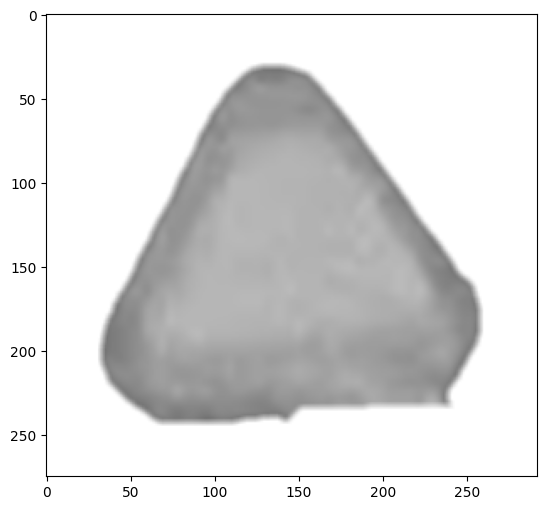

<Figure size 640x480 with 0 Axes>

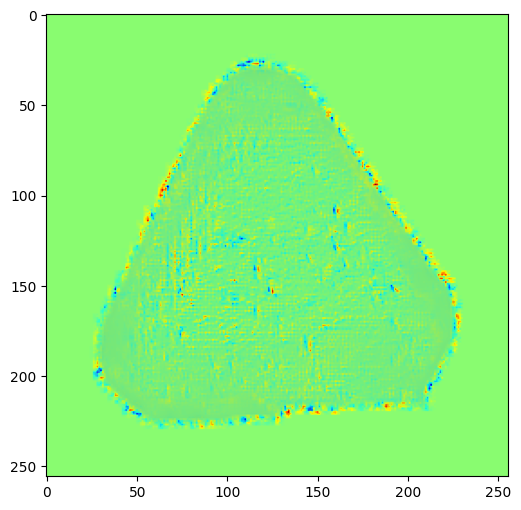

<Figure size 640x480 with 0 Axes>

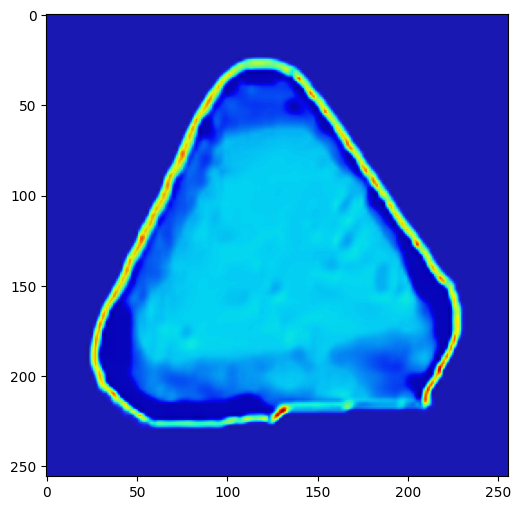

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/extracted_np.png",model)

show_xplique(model,img , np.argmax(result),3,0.9)

In [ ]:
model.save('Model_256x256x3_with_handdrawn.h5')

In [ ]:
from google.colab import files
files.download('Model_256x256x3_with_handdrawn.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/file.zip /content/Model_256x256x1_with_handdrawn.h5

  adding: content/Model_256x256x1_with_handdrawn.h5 (deflated 17%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
i= 1
i= i + 1